In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data="https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv"

In [4]:
!wget $data

--2023-10-17 01:06:37--  https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv’

CreditScoring.csv   100%[===================>] 178.21K  --.-KB/s    in 0.005s  

2023-10-17 01:06:37 (36.5 MB/s) - ‘CreditScoring.csv’ saved [182489/182489]



In [65]:
df=pd.read_csv('CreditScoring.csv')

In [8]:
!head CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [10]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [66]:
df.columns=df.columns.str.lower()

In [39]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910


In [54]:
df.home.value_counts()

2    2107
1     973
5     783
6     319
3     247
4      20
0       6
Name: home, dtype: int64

In [68]:
status_values={1:'ok',
               2:'default',
               0:'unk'}
df.status=df.status.map(status_values)

In [69]:
home_values={1:"rent", 
             2:"owner", 
             3:"priv", 
             4:"ignore", 
             5:"parents", 
             6:"other"}
df.home=df.home.map(home_values)

In [70]:
marital_values={1:"single", 
                 2:"married", 
                 3:"widow", 
                 4:"separated", 
                 5:"divorced"}
df.marital=df.marital.map(marital_values)

In [71]:
records_values={1:"no_rec", 
                2:"yes_rec"}
df.records=df.records.map(records_values)

In [72]:
job_values={1:"fixed", 
            2:"partime", 
            3:"freelance", 
            4:"others"}
df.job=df.job.map(job_values)

In [73]:
df.isnull().sum()

status       0
seniority    0
home         6
time         0
age          0
marital      1
records      0
job          2
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [74]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [75]:
for c in ['income','assets','debt']:
    df[c]=df[c].replace(to_replace=99999999,value=np.nan)

In [76]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [80]:
df=df[df.status!=0].reset_index(drop=True)

In [81]:
from sklearn.model_selection import train_test_split

In [83]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=11)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=11)

In [86]:
len(df),len(df_full_train),len(df_train),len(df_val),len(df_test)

(4455, 3564, 2673, 891, 891)

In [87]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [94]:
y_train=(df_train.status=='default').astype('int')
y_test=(df_test.status=='default').astype('int')
y_val=(df_val.status=='default').astype('int')

In [98]:
del df_train['status']
del df_test['status']
del df_val['status']

In [99]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,3,rent,36,61,married,no_rec,fixed,41,57.0,12000.0,0.0,2500,3559
1,5,rent,48,30,separated,yes_rec,partime,39,41.0,0.0,0.0,1300,1600
2,15,owner,60,32,divorced,no_rec,freelance,35,0.0,6000.0,3300.0,1550,1612
3,2,rent,12,47,married,yes_rec,fixed,103,426.0,0.0,0.0,350,450
4,6,parents,48,32,single,yes_rec,fixed,35,85.0,0.0,0.0,1100,1330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,1,parents,60,21,single,no_rec,partime,35,45.0,0.0,0.0,400,904
2669,5,rent,60,47,single,yes_rec,fixed,46,106.0,8500.0,0.0,2500,2664
2670,23,rent,24,47,single,no_rec,fixed,44,86.0,0.0,0.0,350,975
2671,5,owner,60,58,married,no_rec,freelance,45,93.0,45000.0,0.0,1500,2090


In [100]:
def assess_risk(client):
    if client['records']=='yes':
        if client['job']=='parttime':
            return "default"
        else:
            return "ok"
    else:
        if client['assets']>6000:
            return "ok"
        else:
            return "default"
    

In [105]:
xi=df_train.iloc[0].to_dict()

In [106]:
assess_risk(xi)

'ok'

In [107]:
xi

{'seniority': 3,
 'home': 'rent',
 'time': 36,
 'age': 61,
 'marital': 'married',
 'records': 'no_rec',
 'job': 'fixed',
 'expenses': 41,
 'income': 57.0,
 'assets': 12000.0,
 'debt': 0.0,
 'amount': 2500,
 'price': 3559}

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [125]:
train_dicts=df_train.fillna(0).to_dict(orient='records')

In [126]:
dv=DictVectorizer(sparse=False)

In [127]:
X_train=dv.fit_transform(train_dicts)

In [128]:
X_train

array([[6.10e+01, 2.50e+03, 1.20e+04, ..., 0.00e+00, 3.00e+00, 3.60e+01],
       [3.00e+01, 1.30e+03, 0.00e+00, ..., 1.00e+00, 5.00e+00, 4.80e+01],
       [3.20e+01, 1.55e+03, 6.00e+03, ..., 0.00e+00, 1.50e+01, 6.00e+01],
       ...,
       [4.70e+01, 3.50e+02, 0.00e+00, ..., 0.00e+00, 2.30e+01, 2.40e+01],
       [5.80e+01, 1.50e+03, 4.50e+04, ..., 0.00e+00, 5.00e+00, 6.00e+01],
       [2.20e+01, 1.25e+03, 1.00e+04, ..., 0.00e+00, 4.00e+00, 4.80e+01]])

In [129]:
dv.feature_names_

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=priv',
 'home=rent',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'marital',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=widow',
 'price',
 'records=no_rec',
 'records=yes_rec',
 'seniority',
 'time']

In [130]:
dt=DecisionTreeClassifier()

In [131]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [132]:
val_dicts=df_val.fillna(0).to_dict(orient='records')

In [134]:
X_val=dv.transform(val_dicts)

In [139]:
y_pred=dt.predict_proba(X_val)[:,1]

In [141]:
roc_auc_score(y_val,y_pred)

0.667631861951322

In [142]:
y_pred=dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred)

1.0

In [143]:
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [144]:
val_dicts=df_val.fillna(0).to_dict(orient='records')
X_val=dv.transform(val_dicts)

In [145]:
y_pred=dt.predict_proba(X_val)[:,1]

In [147]:
roc_auc_score(y_val,y_pred)

0.763427236430611

In [148]:
y_pred=dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred)

0.7660925386129352

In [149]:
dt=DecisionTreeClassifier(max_depth=1)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [150]:
val_dicts=df_val.fillna(0).to_dict(orient='records')
X_val=dv.transform(val_dicts)

In [151]:
y_pred=dt.predict_proba(X_val)[:,1]

In [152]:
roc_auc_score(y_val,y_pred)

0.6131750701491985

In [153]:
y_pred=dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred)

0.6271176710091984

In [154]:
from sklearn.tree import export_text

In [159]:
print(export_text(dt,feature_names=dv.feature_names_))

|--- records=no_rec <= 0.50
|   |--- class: 1
|--- records=no_rec >  0.50
|   |--- class: 0



In [160]:
dt=DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [161]:
val_dicts=df_val.fillna(0).to_dict(orient='records')
X_val=dv.transform(val_dicts)

In [162]:
y_pred=dt.predict_proba(X_val)[:,1]

In [163]:
roc_auc_score(y_val,y_pred)

0.6876073869887143

In [164]:
y_pred=dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred)

0.7017132266649385

In [165]:
print(export_text(dt,feature_names=dv.feature_names_))

|--- records=yes_rec <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes_rec >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



In [166]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [167]:
df_example.sort_values(['assets'])

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [176]:
from IPython.display import display

In [179]:
Ts=[0,2000,3000,4000,5000,8000]

In [183]:
for t in Ts:
    print(t)
    df_left=df_example[df_example['assets']<=t]
    df_right=df_example[df_example['assets']>t]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

0


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64
2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64
3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64
4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64
5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64
8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64


In [184]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [185]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [186]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [189]:
for feature,t in thresholds.items():
    print(feature,t)

assets [0, 2000, 3000, 4000, 5000, 8000]
debt [500, 1000, 2000]


In [195]:
for d in [1,2,3,4,5,6,10,15,20,None]:
    dt=DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train,y_train)
    
    y_pred=dt.predict_proba(X_val)[:,1]
    auc=roc_auc_score(y_val,y_pred)
    
    print('%4s -> %.3f' % (d,auc))

   1 -> 0.613
   2 -> 0.688
   3 -> 0.763
   4 -> 0.779
   5 -> 0.783
   6 -> 0.773
  10 -> 0.709
  15 -> 0.672
  20 -> 0.666
None -> 0.679


In [203]:
scores=[]
for d in [4,5,6]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt=DecisionTreeClassifier(max_depth=d,min_samples_leaf=s)
        dt.fit(X_train,y_train)
        y_pred=dt.predict_proba(X_val)[:,1]
        auc=roc_auc_score(y_val,y_pred)
        
        scores.append((d,s,auc))
    
        

In [204]:
df_scores=pd.DataFrame(scores,columns=['max_depth','min_samples_leaf','auc'])

In [207]:
df_scores

,max_depth,min_samples_leaf,auc
0,4,1,0.779339
1,4,2,0.779339
2,4,5,0.779339
3,4,10,0.773767
4,4,15,0.770702
5,4,20,0.783517
6,4,100,0.766987
7,4,200,0.764929
8,4,500,0.671368
9,5,1,0.784438


In [208]:
df_scores.sort_values(by='auc',ascending=False)

,max_depth,min_samples_leaf,auc
23,6,20,0.799043
22,6,15,0.794948
24,6,100,0.793276
21,6,10,0.791787
25,6,200,0.788792
20,6,5,0.786546
15,5,100,0.786425
11,5,5,0.786311
14,5,20,0.785229
9,5,1,0.784438


In [217]:
df_scores_pivot=df_scores.pivot(index=['min_samples_leaf'],columns=['max_depth'],values=['auc'])

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

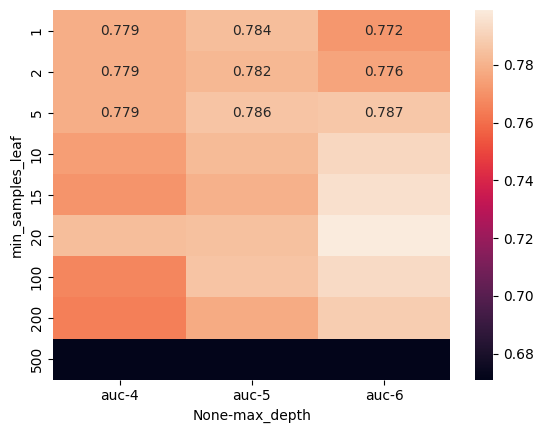

In [220]:
sns.heatmap(df_scores_pivot.round(3),annot=True,fmt='.3f')

In [221]:
dt=DecisionTreeClassifier(max_depth=6,min_samples_leaf=15)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [222]:
from sklearn.ensemble import RandomForestClassifier

In [246]:
rf=RandomForestClassifier(n_estimators=10,random_state=1)

In [247]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [227]:
y_pred=rf.predict_proba(X_val)[:,1]

In [229]:
auc=roc_auc_score(y_val,y_pred)

In [230]:
auc

0.7950592714372242

In [248]:
rf.predict_proba([X_val[0]])

array([[1., 0.]])

In [250]:
scores=[]
for n in range(10,201,10):
    rf=RandomForestClassifier(n_estimators=n,random_state=1)
    rf.fit(X_train,y_train)
    y_pred=rf.predict_proba(X_val)[:,1]
    auc=roc_auc_score(y_val,y_pred)
    scores.append((n,auc))
    
    

In [252]:
df_scores=pd.DataFrame(scores,columns=['n_estimators','auc'])

In [253]:
df_scores

,n_estimators,auc
0,10,0.803919
1,20,0.821459
2,30,0.820597
3,40,0.828246
4,50,0.829120
5,60,0.832980
6,70,0.833987
7,80,0.834813
8,90,0.835066
9,100,0.834000


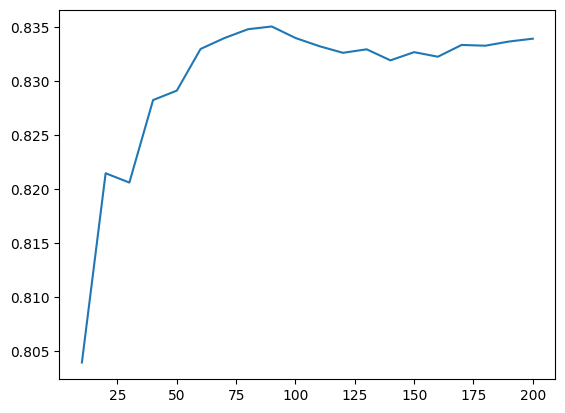

In [255]:
plt.plot(df_scores.n_estimators,df_scores.auc)

In [257]:
scores=[]
for d in [5,10,15]:
    
    for n in range(10,201,10):
        rf=RandomForestClassifier(n_estimators=n,max_depth=d,random_state=1)
        rf.fit(X_train,y_train)
        y_pred=rf.predict_proba(X_val)[:,1]
        auc=roc_auc_score(y_val,y_pred)
        scores.append((d,n,auc))

In [258]:
df_scores=pd.DataFrame(scores,columns=['max_depth','n_estimators','auc'])

In [259]:
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.819497
1,5,20,0.824853
2,5,30,0.828070
3,5,40,0.828100
4,5,50,0.827155


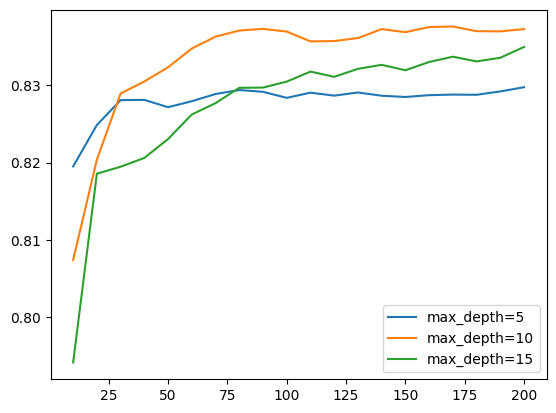

In [262]:
for d in [5,10,15]:
    df_subset=df_scores[df_scores.max_depth==d]
    plt.plot(df_subset.n_estimators,df_subset.auc,label='max_depth=%d' % d)
plt.legend()
    

In [263]:
max_depth=10

In [264]:
scores=[]
for s in [1,3,5,10,50]:
    
    for n in range(10,201,10):
        rf=RandomForestClassifier(n_estimators=n,max_depth=max_depth,min_samples_leaf=s,random_state=1)
        rf.fit(X_train,y_train)
        y_pred=rf.predict_proba(X_val)[:,1]
        auc=roc_auc_score(y_val,y_pred)
        scores.append((s,n,auc))

In [265]:
df_scores=pd.DataFrame(scores,columns=['min_samples_leaf','n_estimators','auc'])

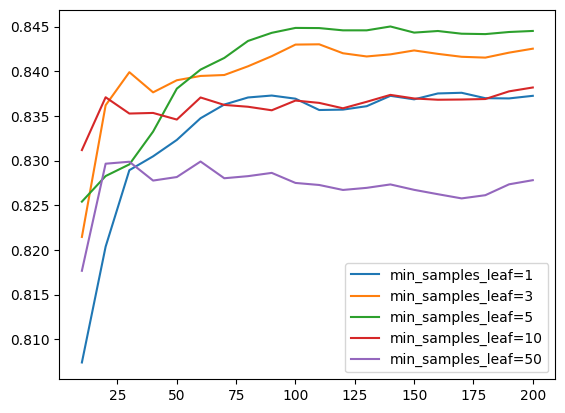

In [267]:
for s in [1,3,5,10,50]:
    df_subset=df_scores[df_scores.min_samples_leaf==s]
    plt.plot(df_subset.n_estimators,df_subset.auc,label='min_samples_leaf=%d' % s)
plt.legend()

In [268]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/c1/cf/a662bc8f40588d54663edfe12980946670490bff0b6e793c7896a4fe36df/xgboost-2.0.0-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.6 MB/s eta 0:00:000m eta 0:00:010:00:01


In [269]:
import xgboost as xgb

In [272]:
features=dv.feature_names_
dtrain=xgb.DMatrix(X_train,label=y_train,feature_names=features)

In [273]:
dval=xgb.DMatrix(X_val,label=y_val,feature_names=features)

In [281]:
xgb_params={
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'nthread':8,
    'seed':1,
    'verbosity':1
}

model=xgb.train(xgb_params,dtrain,num_boost_round=10)

In [282]:
y_pred=model.predict(dval)

In [283]:
auc=roc_auc_score(y_val,y_pred)

In [284]:
auc

0.8240583937996762

In [285]:
watchlist=[(dtrain,'train'),(dval,'val')]

In [349]:
%%capture output
xgb_params={
    'eta':0.01,
    'max_depth':6,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity':1
}

model=xgb.train(xgb_params,dtrain,evals=watchlist,verbose_eval=5,num_boost_round=200)

In [328]:
scores={}

In [350]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [351]:
df_score = parse_xgb_output(output)

In [352]:
key='eta=%s' % xgb_params['eta']
scores[key]=parse_xgb_output(output)

In [355]:
scores['eta=0.01']

,num_iter,train_auc,val_auc
0,0,0.85926,0.80044
1,5,0.86734,0.80148
2,10,0.86978,0.80538
3,15,0.87718,0.81319
4,20,0.88278,0.81684
5,25,0.88722,0.82107
6,30,0.89016,0.82144
7,35,0.89129,0.81975
8,40,0.89171,0.81874
9,45,0.89219,0.81806


In [357]:
scores.keys()

dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

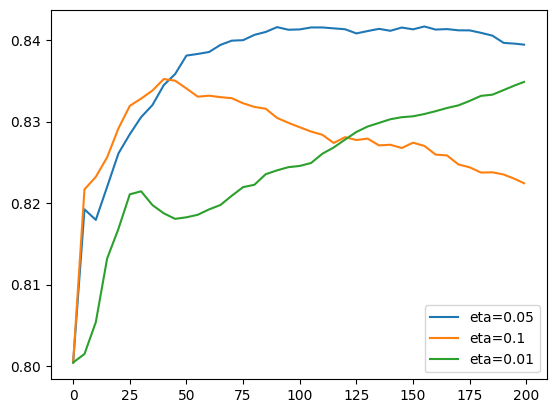

In [367]:
etas=['eta=0.05','eta=0.1','eta=0.01']
for eta in etas:
    df_score=scores[eta]
    plt.plot(df_score.num_iter,df_score.val_auc,label=eta)
plt.legend()